In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import  make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [55]:
X, y, centers = make_blobs(n_samples=100, n_features=2, 
                                cluster_std=3,
                            return_centers=True)

In [56]:
X = pd.DataFrame(X, columns=['x1', 'x2'])
X = pd.concat((X, pd.Series(y, name='y')), axis=1)

<AxesSubplot:xlabel='x1', ylabel='x2'>

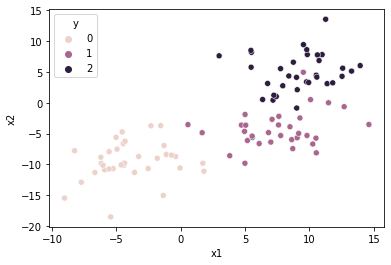

In [57]:
sns.scatterplot(data=X, x='x1', y='x2', hue='y')

In [64]:
n_clusters = 2

In [65]:
model = KMeans(n_clusters)
pred = model.fit_predict(X.drop('y', axis=1))

<AxesSubplot:xlabel='x1', ylabel='x2'>

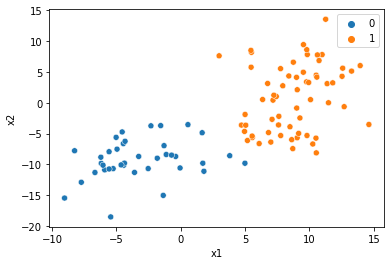

In [66]:
sns.scatterplot(data=X, x='x1', y='x2', hue=pred)

In [68]:
s = silhouette_score(X.drop('y', axis=1), pred)
s

0.5604725263343021

In [67]:
s

0.5324002473132313

In [69]:
si = silhouette_samples(X.drop('y', axis=1), pred)

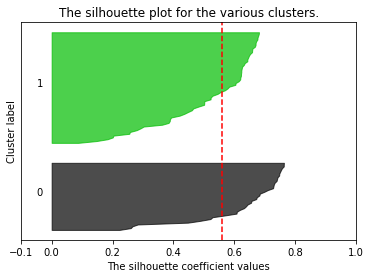

In [70]:
import matplotlib.cm as cm
import numpy as no

y_lower = 10
for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = si[pred== i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
plt.axvline(x=s, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=219e0b3e-460c-4cdb-8d74-e96a8b6095f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>